In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2,f

In [2]:

stf1 = pd.read_csv("./data/1EShowData_data_5stocks_daily_price_2001-2010 (1).csv",encoding="gbk")
stf1 = stf1[['股票代码_Stkcd','日期_Date','收盘价_Clpr','日无风险收益率_DRfRet']]

stf2 = pd.read_csv("./data/1EShowData_data_5stocks_daily_price_2011-2015 (1).csv",encoding="gbk")
stf2 = stf2[['股票代码_Stkcd','日期_Date','收盘价_Clpr','日无风险收益率_DRfRet']]

stf3 = pd.read_csv("./data/1EShowData_data_5stocks_daily_price_2016-2018 (1).csv",encoding="gbk")
stf3 = stf3[['股票代码_Stkcd','日期_Date','收盘价_Clpr','日无风险收益率_DRfRet']]

stf = pd.concat((stf1,stf2,stf3),axis=0)
stf

,股票代码_Stkcd,日期_Date,收盘价_Clpr,日无风险收益率_DRfRet
0,568,2001/1/2,12.70,0.000054
1,568,2001/1/3,13.00,0.000054
2,568,2001/1/4,12.94,0.000054
3,568,2001/1/5,13.41,0.000054
4,568,2001/1/8,13.38,0.000054
...,...,...,...,...
3663,600809,2018/12/24,36.85,0.000088
3664,600809,2018/12/25,36.44,0.000090
3665,600809,2018/12/26,35.66,0.000091
3666,600809,2018/12/27,35.03,0.000091


In [3]:
stf.columns = ['code','date','close','rf']
stf.dropna(axis=0,inplace=True)
#按照代码排序，区分出不同代码的股票
stf.sort_values(by='code',inplace=True)
stf

,code,date,close,rf
0,568,2001/1/2,12.70,0.000054
508,568,2013/1/24,32.77,0.000106
509,568,2013/1/25,31.66,0.000106
510,568,2013/1/28,30.11,0.000106
511,568,2013/1/29,30.46,0.000106
...,...,...,...,...
4893,600809,2011/1/13,62.16,0.000114
4892,600809,2011/1/12,60.80,0.000115
4891,600809,2011/1/11,61.38,0.000117
4973,600809,2011/5/17,70.00,0.000125


In [4]:
#提取有多少股票代码
stf_code = np.unique(stf['code'].values)
stf_code

array([   568,    596,    799,    858, 600809], dtype=int64)

C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\1875852781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf568['date'] = pd.to_datetime(stf568['date'])
C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\1875852781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf568.sort_values(by='date',inplace=True)
C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\1875852781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

(<Axes: >,
      code       date  close        rf    return
 1     568 2001-01-03  13.00  0.000054  0.023347
 2     568 2001-01-04  12.94  0.000054 -0.004626
 3     568 2001-01-05  13.41  0.000054  0.035677
 4     568 2001-01-08  13.38  0.000054 -0.002240
 5     568 2001-01-09  13.01  0.000054 -0.028043
 ..    ...        ...    ...       ...       ...
 728   568 2018-12-24  40.16  0.000088  0.012024
 729   568 2018-12-25  40.53  0.000090  0.009171
 730   568 2018-12-26  39.69  0.000091 -0.020943
 731   568 2018-12-27  40.10  0.000091  0.010277
 732   568 2018-12-28  40.66  0.000092  0.013868
 
 [4234 rows x 5 columns])

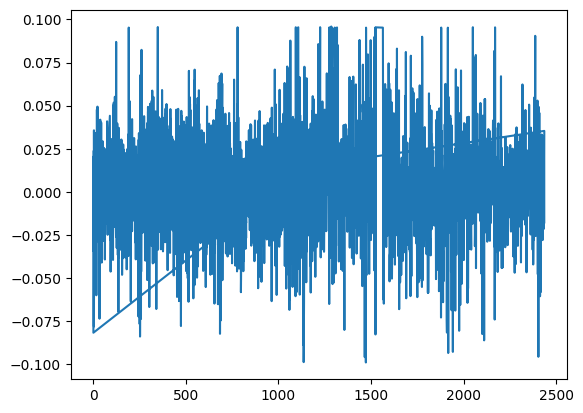

In [5]:



stf568 = stf.loc[stf['code']==stf_code[0]]
stf568['date'] = pd.to_datetime(stf568['date'])
stf568.sort_values(by='date',inplace=True)
stf568['return'] = np.log(stf568['close'])-np.log(stf568['close'].shift(periods=1))
stf568.dropna(inplace=True)
stf568 = stf568.loc[(stf568['return']>=-0.1) &(stf568['return']<=0.1)]

stf568['return'].plot(),stf568

C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\1247276480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf596['date'] = pd.to_datetime(stf596['date'])
C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\1247276480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf596.sort_values(by='date',inplace=True)
C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\1247276480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

<Axes: >

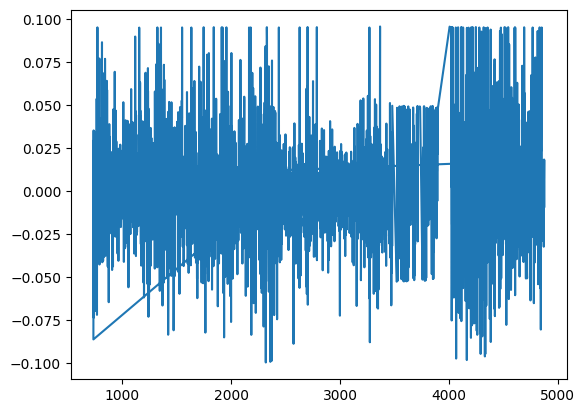

In [6]:
stf596 = stf.loc[stf['code']==stf_code[1]]
stf596['date'] = pd.to_datetime(stf596['date'])
stf596.sort_values(by='date',inplace=True)
stf596['return'] = np.log(stf596['close'])-np.log(stf596['close'].shift(periods=1))
stf596.dropna(inplace=True)
stf596 = stf596.loc[(stf596['return']>=-0.1) &(stf596['return']<=0.1)]

stf596['return'].plot()

C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\427542569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf799['date'] = pd.to_datetime(stf799['date'])
C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\427542569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf799.sort_values(by='date',inplace=True)
C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\427542569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

<Axes: >

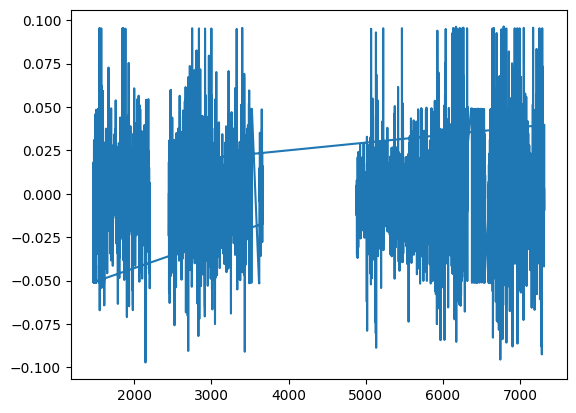

In [7]:
stf799 = stf.loc[stf['code']==stf_code[2]]
stf799['date'] = pd.to_datetime(stf799['date'])
stf799.sort_values(by='date',inplace=True)
stf799['return'] = np.log(stf799['close'])-np.log(stf799['close'].shift(periods=1))
stf799.dropna(inplace=True)
stf799 = stf799.loc[(stf799['return']>=-0.1) &(stf799['return']<=0.1)]

stf799['return'].plot()

C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\1469745843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf858['date'] = pd.to_datetime(stf858['date'])
C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\1469745843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf858.sort_values(by='date',inplace=True)
C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\1469745843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

<Axes: >

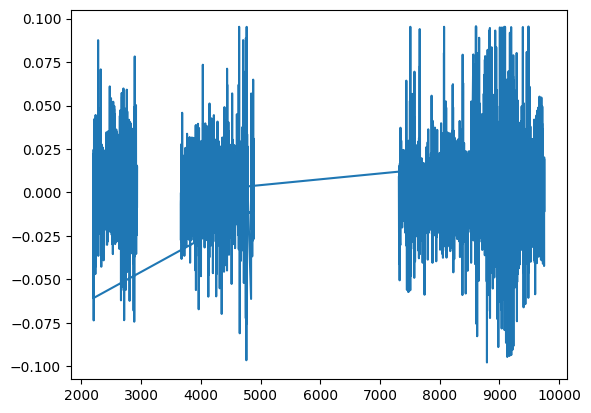

In [8]:
stf858 = stf.loc[stf['code']==stf_code[3]]
stf858['date'] = pd.to_datetime(stf858['date'])

stf858.sort_values(by='date',inplace=True)

stf858['return'] = np.log(stf858['close'])-np.log(stf858['close'].shift(periods=1))

stf858.dropna(inplace=True)

stf858 = stf858.loc[(stf858['return']>=-0.1) &(stf858['return']<=0.1)]



stf858['return'].plot()

C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\808967597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf600809['date'] = pd.to_datetime(stf600809['date'])
C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\808967597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf600809.sort_values(by='date',inplace=True)
C:\Users\hphp\AppData\Local\Temp\ipykernel_23744\808967597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

<Axes: >

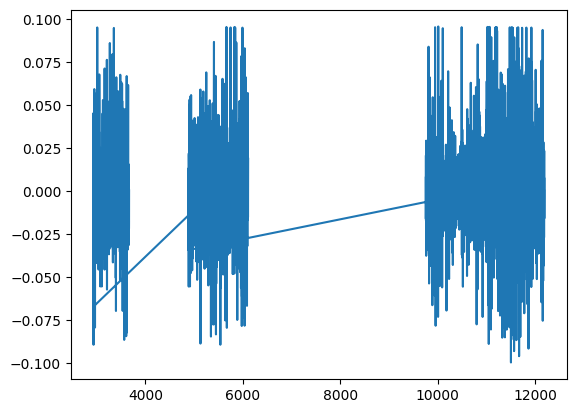

In [9]:
stf600809 = stf.loc[stf['code']==stf_code[4]]
stf600809['date'] = pd.to_datetime(stf600809['date'])
stf600809.sort_values(by='date',inplace=True)
stf600809['return'] = np.log(stf600809['close'])-np.log(stf600809['close'].shift(periods=1))
stf600809.dropna(inplace=True)
stf600809 = stf600809.loc[(stf600809['return']>=-0.1) &(stf600809['return']<=0.1)]

stf600809['return'].plot()

(<Axes: >,
            date   close        rf    return
 1    2001-08-28   36.86  0.000054  0.036187
 2    2001-08-29   36.38  0.000054 -0.013108
 3    2001-08-30   37.10  0.000054  0.019598
 4    2001-08-31   37.01  0.000054 -0.002429
 5    2001-09-03   36.99  0.000054 -0.000541
 ...         ...     ...       ...       ...
 4232 2018-12-24  568.00  0.000088  0.001039
 4233 2018-12-25  565.79  0.000090 -0.003898
 4234 2018-12-26  560.08  0.000091 -0.010143
 4235 2018-12-27  563.00  0.000091  0.005200
 4236 2018-12-28  590.01  0.000092  0.046860
 
 [4125 rows x 4 columns])

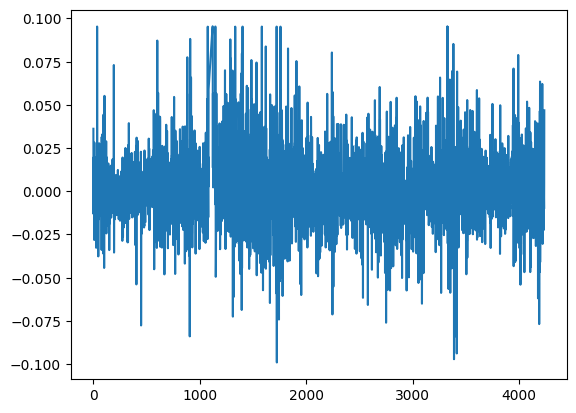

In [10]:
maotai = pd.read_csv("./data/1EShowData_data_stock_daily_price_2001-2018 (1).csv",encoding="gbk",usecols=[1,5,10])
maotai.columns =['date','close','rf']
maotai.dropna(inplace=True)
maotai['date'] = pd.to_datetime(maotai['date'])
maotai.sort_values(by='date',inplace=True)
maotai['return'] = np.log(maotai['close'])-np.log(maotai['close'].shift(periods=1))
maotai.dropna(inplace=True)
maotai = maotai.loc[(maotai['return']>=-0.1) &(maotai['return']<=0.1)]

maotai['return'].plot(),maotai

(<Axes: >,
            date    close    return
 1    2005-01-05   992.56  0.009892
 2    2005-01-06   983.17 -0.009505
 3    2005-01-07   983.96  0.000803
 4    2005-01-10   993.88  0.010031
 5    2005-01-11   997.13  0.003265
 ...         ...      ...       ...
 3397 2018-12-24  3038.20  0.002901
 3398 2018-12-25  3017.28 -0.006909
 3399 2018-12-26  3002.03 -0.005067
 3400 2018-12-27  2990.51 -0.003845
 3401 2018-12-28  3010.65  0.006712
 
 [3401 rows x 3 columns])

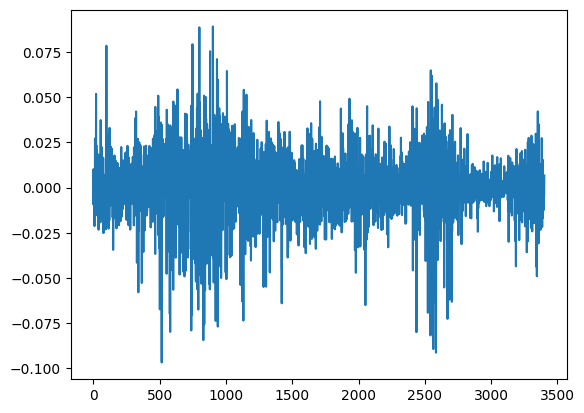

In [11]:
husheng300 = pd.read_csv("./data/1EShowData_data_Index_daily_price_2001-2018.csv",encoding="gbk")
husheng300 = husheng300[['交易日期_TrdDt','收盘价(元/点)_ClPr']]
husheng300.columns = ['date','close']
husheng300['date']=pd.to_datetime(husheng300['date'])
husheng300.dropna(axis=0,inplace=True,how='any')
husheng300['return'] = np.log(husheng300['close'])-np.log(husheng300['close'].shift(1))
husheng300.dropna(axis=0,how='any',inplace=True)
husheng300 = husheng300.loc[(husheng300['return']>=-0.1) & (husheng300['return']<=0.1)]
husheng300['return'].plot(),husheng300

In [12]:
data_matrix = pd.merge(left=husheng300[['date','return']],right=maotai[['date','return']],on='date',how='inner',sort=True)
data_matrix.columns = ['date','husheng300','maotai']
data_matrix = pd.merge(left=data_matrix[['date','husheng300','maotai']],right=stf568[['date','return']],on='date',how='inner',sort=True)
data_matrix.columns = ['date','husheng300','maotai','stf568']
data_matrix = pd.merge(left=data_matrix[['date','husheng300','maotai','stf568']],right=stf596[['date','return']],on='date',how='inner',sort=True)
data_matrix.columns = ['date','husheng300','maotai','stf568','stf596']
data_matrix = pd.merge(left=data_matrix[['date','husheng300','maotai','stf568','stf596']],right=stf799[['date','return']],on='date',how='inner',sort=True)
data_matrix.columns = ['date','husheng300','maotai','stf568','stf596','stf799']
data_matrix = pd.merge(left=data_matrix[['date','husheng300','maotai','stf568','stf596','stf799']],right=stf858[['date','return']],on='date',how='inner',sort=True)
data_matrix.columns = ['date','husheng300','maotai','stf568','stf596','stf799','stf858']
data_matrix = pd.merge(left=data_matrix[['date','husheng300','maotai','stf568','stf596','stf799','stf858']],right=stf600809[['date','return']],on='date',how='inner',sort=True)
data_matrix.columns = ['date','husheng300','maotai','stf568','stf596','stf799','stf858','stf600809']
data_matrix

,date,husheng300,maotai,stf568,stf596,stf799,stf858,stf600809
0,2005-01-05,0.009892,0.021442,0.014065,0.019452,0.011800,0.015061,0.022877
1,2005-01-06,-0.009505,-0.017335,-0.002797,-0.017668,-0.008837,-0.002994,-0.003236
2,2005-01-07,0.000803,0.008163,0.008368,0.007105,0.000000,0.010440,0.019262
3,2005-01-10,0.010031,0.035932,0.000000,0.012313,0.049072,0.011800,-0.003185
4,2005-01-11,0.003265,0.001306,0.011050,0.001747,0.005618,-0.002937,-0.001596
...,...,...,...,...,...,...,...,...
2790,2018-12-24,0.002901,0.001039,0.012024,0.015501,0.006420,0.007089,0.006807
2791,2018-12-25,-0.006909,-0.003898,0.009171,-0.011201,-0.007005,-0.001964,-0.011189
2792,2018-12-26,-0.005067,-0.010143,-0.020943,-0.030682,-0.005286,-0.008887,-0.021637
2793,2018-12-27,-0.003845,0.005200,0.010277,-0.012429,-0.054460,-0.005171,-0.017825


In [13]:
data_matrix = pd.merge(left=data_matrix[['date','husheng300','maotai','stf568','stf596','stf799','stf858','stf600809']],right=maotai[['date','rf']],on='date',how='inner',sort=True)
data_matrix.columns = ['date','husheng300','maotai','stf568','stf596','stf799','stf858','stf600809','rf']
for data in data_matrix.columns[1:-1]:
    data_matrix[data] = data_matrix[data]-data_matrix['rf']
data_matrix.loc[:,'date':'stf600809']

,date,husheng300,maotai,stf568,stf596,stf799,stf858,stf600809
0,2005-01-05,0.009819,0.021369,0.013992,0.019379,0.011727,0.014988,0.022804
1,2005-01-06,-0.009576,-0.017406,-0.002868,-0.017739,-0.008908,-0.003065,-0.003307
2,2005-01-07,0.000732,0.008092,0.008297,0.007034,-0.000071,0.010369,0.019191
3,2005-01-10,0.009960,0.035861,-0.000071,0.012242,0.049001,0.011729,-0.003256
4,2005-01-11,0.003194,0.001235,0.010979,0.001676,0.005547,-0.003008,-0.001667
...,...,...,...,...,...,...,...,...
2790,2018-12-24,0.002813,0.000951,0.011936,0.015413,0.006332,0.007001,0.006719
2791,2018-12-25,-0.006999,-0.003988,0.009081,-0.011291,-0.007095,-0.002054,-0.011279
2792,2018-12-26,-0.005158,-0.010234,-0.021034,-0.030773,-0.005377,-0.008978,-0.021728
2793,2018-12-27,-0.003936,0.005109,0.010186,-0.012520,-0.054551,-0.005262,-0.017916


In [14]:
#wald检验
ret_ind = data_matrix['husheng300'].values
T = len(ret_ind)
N = 6
mu_market = np.mean(ret_ind)
sigma_market = np.sum(ret_ind-mu_market**2)/T
res_stocks = data_matrix.loc[:,'maotai':'stf600809']
res_stocks

,maotai,stf568,stf596,stf799,stf858,stf600809
0,0.021369,0.013992,0.019379,0.011727,0.014988,0.022804
1,-0.017406,-0.002868,-0.017739,-0.008908,-0.003065,-0.003307
2,0.008092,0.008297,0.007034,-0.000071,0.010369,0.019191
3,0.035861,-0.000071,0.012242,0.049001,0.011729,-0.003256
4,0.001235,0.010979,0.001676,0.005547,-0.003008,-0.001667
...,...,...,...,...,...,...
2790,0.000951,0.011936,0.015413,0.006332,0.007001,0.006719
2791,-0.003988,0.009081,-0.011291,-0.007095,-0.002054,-0.011279
2792,-0.010234,-0.021034,-0.030773,-0.005377,-0.008978,-0.021728
2793,0.005109,0.010186,-0.012520,-0.054551,-0.005262,-0.017916


In [15]:
#无限制模型
x = np.ones((T,2))
x[:,1] = ret_ind
y = res_stocks
xTx = np.dot(np.transpose(x),x)
xTy = np.dot(np.transpose(x),y)
AB_hat = np.dot(np.linalg.inv(xTx),xTy)
alpha = AB_hat[0]
beta = AB_hat[1]
resid = y-np.dot(x,AB_hat)
cov = np.dot(np.transpose(resid),resid)/T
invCov = np.linalg.inv(cov)
beta,alpha

(array([0.62260083, 0.86358675, 0.91083517, 0.88472866, 0.91835862,
        0.89569436]),
 array([0.00080167, 0.00056553, 0.00097406, 0.0003848 , 0.00040081,
        0.00076225]))

In [16]:
#限制模型
xr = np.ones((T,1))
xr[:,0]=ret_ind
yr = res_stocks
xrTxr = np.dot(np.transpose(xr),xr)
xrTyr = np.dot(np.transpose(xr),yr)
ABr_hat = np.dot(np.linalg.inv(xrTxr),xrTyr)
RESDr = yr-np.dot(xr,ABr_hat)
COVr = np.dot(np.transpose(RESDr),RESDr)/T
invCOVr = np.linalg.inv(COVr)


In [17]:
#Wald检验
trans_ALPHA = np.ones((len(alpha),1))
trans_ALPHA[:,0]=alpha
SWChi2 = T*(1/(1+mu_market**2/sigma_market))*np.dot(np.dot(alpha,invCov),trans_ALPHA)
SWF= (T-N-1)/N*(1/(1+mu_market**2/sigma_market))*np.dot(np.dot(alpha,invCov),trans_ALPHA)
pvalue_Wchi2 = 1 - chi2.cdf(SWChi2[0],N)
pvalue_WF = 1-f.cdf(SWF[0],N,T-N-1)
pvalue_Wchi2,pvalue_WF

(0.22125821928507383, 0.22311559606444709)

In [18]:
#似然比
SLRchi2 = T*(np.log(np.linalg.det(COVr))-np.log(np.linalg.det(cov)))
p_SLR = 1 - chi2.cdf(SLRchi2,N)
p_SLR

0.22305244628977283

In [19]:
#拉格朗日乘子
a = np.zeros((6,1))
a[:,0] = np.sum(RESDr,axis=0)
salpha = np.dot(invCOVr,a)
b = np.dot(ret_ind,RESDr)
sbeta = np.zeros((6,1))
sbeta[:,0] = np.dot(invCOVr,b)
score = np.concatenate((salpha,sbeta),axis=0)
score

array([[ 6.88237948e+03],
       [ 2.42276452e+02],
       [ 2.76260931e+03],
       [-7.87479943e+02],
       [-2.77332496e+03],
       [ 1.66366185e+03],
       [-1.35737238e-12],
       [ 3.26235585e-13],
       [-6.55570946e-13],
       [ 7.77866655e-13],
       [ 1.85232581e-12],
       [-5.42633832e-13]])

In [20]:
a = np.concatenate((invCOVr*T,invCOVr*np.sum(ret_ind)),axis=1)
b = np.concatenate((invCOVr*np.sum(ret_ind),invCOVr*np.sum(ret_ind**2)),axis = 1)
Minfo = np.concatenate((a,b),axis=0)
SLMchi2 = np.dot(np.dot(np.transpose(score),np.linalg.inv(Minfo)),score)
pvalue_SLMchi2 = 1 - chi2.cdf(SLMchi2[0][0],N)
pvalue_SLMchi2

0.22389055874284758